### STEP-1 IMPORTING LIBRARIES

In [3]:
# loading the library
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

### STEP-2 Loading The Dataset 

In [5]:
df = pd.read_csv('flight_dataset.csv')
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


### STEP-3 Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

### 3.1) understanding Your Variables
        3.1.1) Head of the dataset
        3.1.2) The shape of the dataset
        3.1.3) List types of all columns
        3.1.4) Info of the dataset
        3.1.5) Summary of the dataset
        
### 3.2) Data Cleaning
        3.2.1) Checking the Duplicates
        3.2.2) Check the Null values

##### Let's Understand Variables

### 3.1.1) Head of the Dataset

The head() function will tell you the top records in the dataset. By default, python shows you only the top 5 records.

This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [6]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [7]:
# Display last five records of the data
df.tail()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,2,11753,9,5,2019,10,55,19,15,8,20


### 3.1.2) The Shape of the dataset
This shape() function gives us the **number of rows** and **columns** of the dataset.

In [8]:
df.shape

(10683, 14)

In [98]:
df.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Date               int64
Month              int64
Year               int64
Dep_hours          int64
Dep_min            int64
Arrival_hours      int64
Arrival_min        int64
Duration_hours     int64
Duration_min       int64
dtype: object

### 3.1.3) List types of all columns 
Using df.dtypes, we get the list of types of all the columns in our dataset.

In [9]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

### 3.1.4) Info of the dataset
info() is used to check the information about the data and the datatypes of each respective attribute and also gives you the count.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


### 3.1.5) Summary of the dataset

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

In [11]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


### Data Cleaning

#### 3.2.1) Checking the Duplicates
check is there any duplicates rows are exist then we should remove from the dataframe.

In [12]:
#Checking for Duplicates
df[df.duplicated()]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
683,Jet Airways,Delhi,Cochin,2,13376,1,6,2019,14,35,4,25,13,50
1061,Air India,Delhi,Cochin,2,10231,21,5,2019,22,0,19,15,21,15
1348,Air India,Delhi,Cochin,2,12392,18,5,2019,17,15,19,15,26,0
1418,Jet Airways,Delhi,Cochin,2,10368,6,6,2019,5,30,4,25,22,55
1674,IndiGo,Banglore,New Delhi,0,7303,24,3,2019,18,25,21,20,2,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,2,12819,27,6,2019,23,5,12,35,13,30
10616,Jet Airways,Delhi,Cochin,2,13014,1,6,2019,9,40,12,35,26,55
10634,Jet Airways,Delhi,Cochin,2,11733,6,6,2019,9,40,12,35,26,55
10672,Jet Airways,Delhi,Cochin,2,11150,27,6,2019,23,5,19,0,19,55


In [13]:
# Copy 
df1 = df.copy(deep = True)

In [14]:
df1

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [15]:
#Dropping the Duplicates
df=df.drop_duplicates()

In [16]:
df.shape

(10461, 14)

In [ ]:
df.

In [17]:
df1.shape

(10683, 14)

You can see there are some duplicates data so we dropped duplicated data      
before the no of records = 10683, 14         
after droping the duplicates the no of records = 10461, 14

In [18]:
df[df.duplicated]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min


In [19]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


### 3.2.2) Check the Null Values

Using .isnull.sum() function we can see the null values present in the every column in the dataset.

In [20]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

##### Observation  - There is No Null Values 

In [21]:
# list the types of all columns 
df.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Date               int64
Month              int64
Year               int64
Dep_hours          int64
Dep_min            int64
Arrival_hours      int64
Arrival_min        int64
Duration_hours     int64
Duration_min       int64
dtype: object

### Always we want to start performing EDA based on target variable

### Target Variable - Price

In [22]:
df.Price.describe()

count    10461.000000
mean      9027.212504
std       4624.861032
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12346.000000
max      79512.000000
Name: Price, dtype: float64

In [23]:
df[df.Price == df.Price.min()]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
4066,SpiceJet,Mumbai,Hyderabad,0,1759,21,3,2019,22,45,0,10,1,25
4274,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,2019,22,45,0,10,1,25
4839,SpiceJet,Mumbai,Hyderabad,0,1759,3,4,2019,22,45,0,15,1,30
10513,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,2019,5,45,7,5,1,20


In [24]:
df[df.Price == df.Price.max()]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
2924,Jet Airways Business,Banglore,New Delhi,1,79512,1,3,2019,5,45,11,25,5,40


In [25]:
df.Price.mean()

9027.212503584744

### 4) Data Visualization

#### 4.1) Histograms (univariate analysis)

Histograms are one of the most common graphs used to display numeric data.   
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

(array([5.991e+03, 4.207e+03, 1.810e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

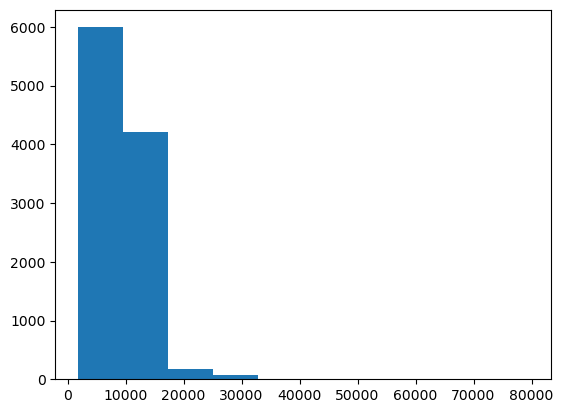

In [26]:
plt.hist(df['Price'])

<Axes: xlabel='Price'>

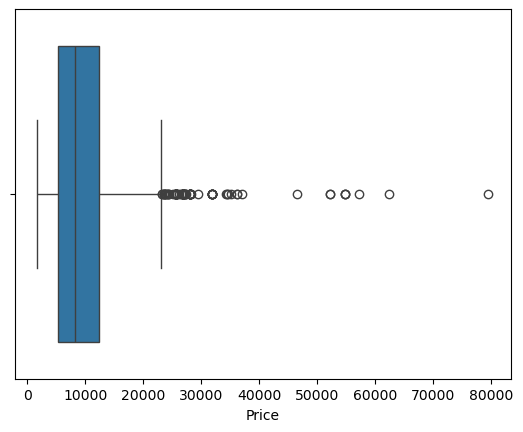

In [27]:
sns.boxplot(x=df.Price)

In [28]:
# Now we are going to perform IQR [Inter Quartile Range] using IQR = Q3 - Q1
Price_IQR=df.Price.quantile(0.75)-df.Price.quantile(0.25)
print('Price_IQR =',Price_IQR)
Price_HE=df.Price.quantile(0.75)+(1.5*Price_IQR)
print('Price_HE =',Price_HE)
Price_LE=df.Price.quantile(0.25)-(1.5*Price_IQR)
print('Price_LE =',Price_LE)
len(df.Price[df.Price>Price_HE])

Price_IQR = 7122.0
Price_HE = 23029.0
Price_LE = -5459.0


94

### Their are Extreme Outliers so we will remove the outliers

In [29]:
# Remove outliers
new_df = df[(df['Price'] >= Price_LE) & (df['Price'] <= Price_HE)]

<Axes: xlabel='Price'>

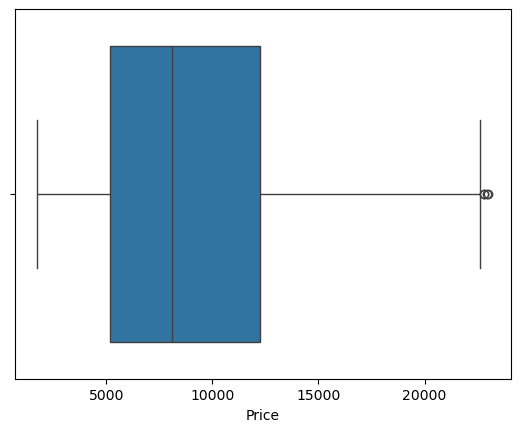

In [30]:
sns.boxplot(x=new_df.Price)

In [31]:
new_df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [32]:
df.shape

(10461, 14)

In [33]:
new_df.shape

(10367, 14)

<Axes: ylabel='Density'>

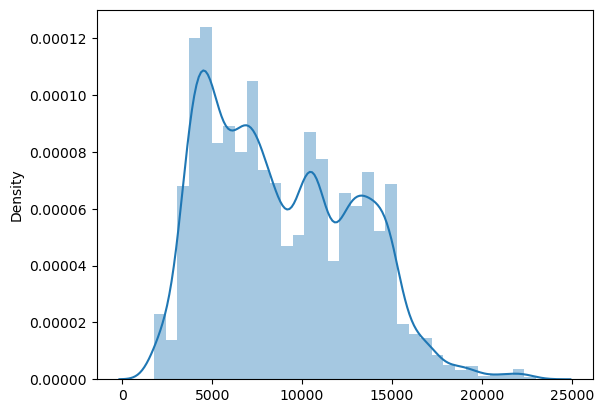

In [34]:
sns.distplot(x=new_df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

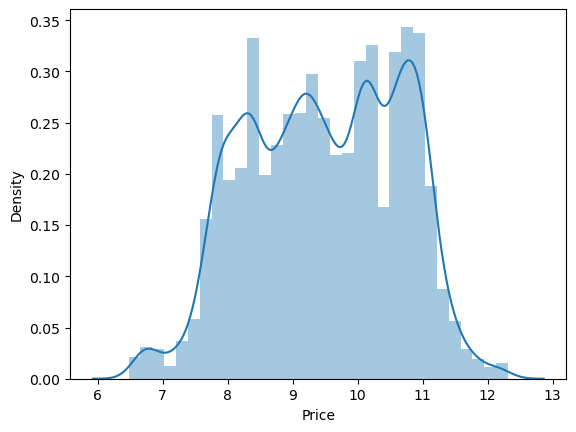

In [97]:
sns.distplot(np.sqrt(new_df['Price']))

In [36]:
new_df['Price']=np.sqrt(df['Price'])

In [39]:
new_df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,62.425956,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,87.532851,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,117.821899,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,78.854296,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,115.334297,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,64.085880,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,64.381674,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,85.023526,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,112.463327,1,3,2019,11,30,14,10,2,40


In [40]:
new_df.describe().columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hours', 'Dep_min',
       'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min'],
      dtype='object')

In [41]:
new_df[['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hours', 'Dep_min',
       'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']].corr()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
Total_Stops,1.000000,0.690047,-0.013607,0.045958,NaN,-0.067194,-0.005287,0.053496,-0.108568,0.731980,-0.150735
Price,0.690047,1.000000,-0.115758,-0.049946,NaN,-0.000376,-0.060161,0.059882,-0.106219,0.596388,-0.152311
Date,-0.013607,-0.115758,1.000000,-0.056039,NaN,-0.004776,0.000574,-0.003351,-0.015528,-0.025733,-0.009171
Month,0.045958,-0.049946,-0.056039,1.000000,NaN,0.041585,-0.057307,-0.000927,-0.101102,0.010018,-0.046992
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hours,-0.067194,-0.000376,-0.004776,0.041585,NaN,1.000000,-0.016402,-0.000585,0.073459,0.000197,-0.020295
Dep_min,-0.005287,-0.060161,0.000574,-0.057307,NaN,-0.016402,1.000000,0.047968,-0.020801,-0.024853,0.089055
Arrival_hours,0.053496,0.059882,-0.003351,-0.000927,NaN,-0.000585,0.047968,1.000000,-0.151354,0.065805,-0.115950
Arrival_min,-0.108568,-0.106219,-0.015528,-0.101102,NaN,0.073459,-0.020801,-0.151354,1.000000,-0.076516,0.155478
Duration_hours,0.731980,0.596388,-0.025733,0.010018,NaN,0.000197,-0.024853,0.065805,-0.076516,1.000000,-0.135394


<Axes: >

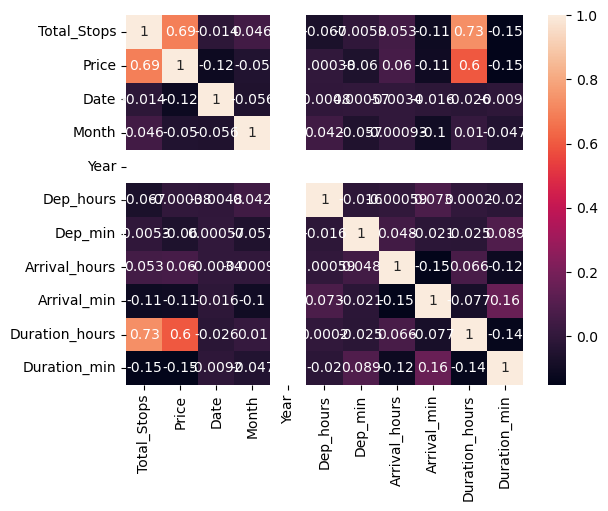

In [42]:
sns.heatmap(new_df[new_df.describe().columns].corr(),annot=True)

In [43]:
new_df[['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hours', 'Dep_min',
       'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']].corr()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
Total_Stops,1.000000,0.690047,-0.013607,0.045958,NaN,-0.067194,-0.005287,0.053496,-0.108568,0.731980,-0.150735
Price,0.690047,1.000000,-0.115758,-0.049946,NaN,-0.000376,-0.060161,0.059882,-0.106219,0.596388,-0.152311
Date,-0.013607,-0.115758,1.000000,-0.056039,NaN,-0.004776,0.000574,-0.003351,-0.015528,-0.025733,-0.009171
Month,0.045958,-0.049946,-0.056039,1.000000,NaN,0.041585,-0.057307,-0.000927,-0.101102,0.010018,-0.046992
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hours,-0.067194,-0.000376,-0.004776,0.041585,NaN,1.000000,-0.016402,-0.000585,0.073459,0.000197,-0.020295
Dep_min,-0.005287,-0.060161,0.000574,-0.057307,NaN,-0.016402,1.000000,0.047968,-0.020801,-0.024853,0.089055
Arrival_hours,0.053496,0.059882,-0.003351,-0.000927,NaN,-0.000585,0.047968,1.000000,-0.151354,0.065805,-0.115950
Arrival_min,-0.108568,-0.106219,-0.015528,-0.101102,NaN,0.073459,-0.020801,-0.151354,1.000000,-0.076516,0.155478
Duration_hours,0.731980,0.596388,-0.025733,0.010018,NaN,0.000197,-0.024853,0.065805,-0.076516,1.000000,-0.135394


In [44]:
df.describe(include = 'object')

,Airline,Source,Destination
count,10461,10461,10461
unique,12,5,6
top,Jet Airways,Delhi,Cochin
freq,3700,4346,4346


In [45]:
cat_cols = new_df.describe(include = 'object').columns.to_list()
print(cat_cols)

['Airline', 'Source', 'Destination']


In [99]:
for i in cat_cols:
    print(df[i].value_counts())
    print(df[i].unique())
    print(df[i].nunique())
    print(df.groupby(i)['Price'].mean().sort_values())
    print('----'*30)

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
12
Airline
Trujet                                4140.000000
SpiceJet                              4335.841718
Air Asia                              5593.745283
IndiGo                                5668.469897
GoAir                                 5861.056701
Vistara 

### If the Number of Duration_hours increases then price will also increases

In [47]:
new_df.groupby(['Duration_hours'])['Price'].mean()

Duration_hours
1      60.887598
2      70.054004
3      78.354464
4      78.851062
5      91.027029
6     100.556989
7     104.773557
8     101.233820
9     102.367520
10    103.208013
11    104.734814
12    103.002401
13    104.765292
14     99.064695
15     99.460473
16    100.695720
17    109.312504
18    110.411116
19    107.893783
20    107.972950
21    109.460175
22    108.389174
23    108.437488
24    106.607623
25    102.114904
26    105.541742
27    103.851227
28    108.130836
29    117.118367
30    108.669322
31    117.219786
32    109.064402
33    113.165492
34    120.510243
35    114.917584
36    107.115422
37    113.120322
38    103.944415
39    130.900726
40    108.586371
41    118.279330
42    110.610511
47    142.750771
Name: Price, dtype: float64

### Based on the Source and Destination it will check the avg of price and sort the values

In [100]:
#Based on the source and Destination, we calculated the price in the ascending order
df.groupby(['Source', 'Destination'])['Price'].mean().sort_values()

Source    Destination
Chennai   Kolkata         4789.892388
Mumbai    Hyderabad       5059.708752
Banglore  Delhi           5143.918577
Kolkata   Banglore        9143.083566
Delhi     Cochin         10460.914634
Banglore  New Delhi      12020.496711
Name: Price, dtype: float64

####  If the Total_stops increases the Price will also increases

In [49]:
new_df.groupby(['Total_Stops'])['Price'].mean().sort_values()

Total_Stops
0     69.562771
1    100.178902
2    111.300603
3    114.507902
4    132.988721
Name: Price, dtype: float64

##### In this Dataset We have 4 Unique months they are March,May,June,April

In [50]:
new_df.Month.unique()

array([3, 5, 6, 4], dtype=int64)

####  Checking The Avg Price based on every Month and sorted the values in the ascending order

In [51]:
new_df.groupby(['Month'])['Price'].mean().sort_values()

Month
4    74.725315
6    91.126406
5    92.486922
3    97.243356
Name: Price, dtype: float64

In [53]:
df1 = new_df.copy(deep=True)

In [54]:
df1

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,62.425956,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,87.532851,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,117.821899,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,78.854296,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,115.334297,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,64.085880,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,64.381674,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,85.023526,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,112.463327,1,3,2019,11,30,14,10,2,40


In [55]:
df1.head(3)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,62.425956,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,87.532851,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,117.821899,9,6,2019,9,25,4,25,19,0


#### Feature Encoding

In [56]:
df_e = pd.get_dummies(new_df,drop_first = True).astype('int')

In [57]:
df_e

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,62,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,87,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,117,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,78,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,115,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,64,9,4,2019,19,55,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,64,27,4,2019,20,45,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,0,85,27,4,2019,8,20,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,0,112,1,3,2019,11,30,14,10,2,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df_e.shape

(10367, 30)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### One-Hot Encoding: Converts categories into binary columns (e.g., airline type)

In [60]:
X = df_e.drop('Price',axis=1)
y = df_e['Price']

In [79]:
X

,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,2019,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,2019,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,2019,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y

0         62
1         87
2        117
3         78
4        115
        ... 
10678     64
10679     64
10680     85
10681    112
10682    108
Name: Price, Length: 10367, dtype: int32

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [67]:
from sklearn.metrics import r2_score

In [68]:
print('Training Score=',r2_score(y_train,y_train_pred))
print('Testing Score=',r2_score(y_test,y_test_pred))

Training Score= 0.699884061327418
Testing Score= 0.68208246125189


In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [71]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [72]:
print('Training Score=',r2_score(y_train,y_train_pred))
print('Testing Score=',r2_score(y_test,y_test_pred))

Training Score= 0.9669528395027982
Testing Score= 0.7580121826180022


In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor(max_depth=4)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4)

In [76]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [77]:
print('Training Score=',r2_score(y_train,y_train_pred))
print('Testing Score=',r2_score(y_test,y_test_pred))

Training Score= 0.7030020231831746
Testing Score= 0.6921247143925762


In [81]:
X

,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,2019,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,2019,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,2019,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [82]:
x1=X[['Total_Stops','Duration_hours']]

In [83]:
X_train,X_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=0)

In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [87]:
print('Training Score=',r2_score(y_train,y_train_pred))
print('Testing Score=',r2_score(y_test,y_test_pred))

Training Score= 0.49935547871041897
Testing Score= 0.473469503775495


In [91]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [92]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [93]:
print('Training Score=',r2_score(y_train,y_train_pred))
print('Testing Score=',r2_score(y_test,y_test_pred))

Training Score= 0.5970674876157469
Testing Score= 0.5832596412507276


In [88]:
rf = RandomForestRegressor(max_depth=4)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4)

In [89]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [90]:
print('Training Score=',r2_score(y_train,y_train_pred))
print('Testing Score=',r2_score(y_test,y_test_pred))

Training Score= 0.5877882083507315
Testing Score= 0.5771942891565551
